### **Time Series using Tensorflow**

* This topic will be covered whilst doing a project: BitPredict [Predicting price of bitcoin based on its historical data]
* It is not a financial advice

**1. Data loading and pre-processing**<br><br>
https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv


In [1]:
# !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2025-03-25 18:03:45--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K   903KB/s    in 0.2s    

2025-03-25 18:03:45 (903 KB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [2]:
# DL needs
import tensorflow as tf
import keras as kr

# Data needs
import pandas as pd
from sklearn.model_selection import train_test_split

# Numerical computation needs
import numpy as np

# plotting needs
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# ensuring reproducibility
random_seed=42
tf.random.set_seed(random_seed)

2025-03-25 18:03:46.021298: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
data = pd.read_csv('bitcoin_data.csv', parse_dates=['Date'], index_col=['Date'])
# parse the date column and tell pandas column 1 is date-time

data.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [7]:
data.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [6]:
# how many samples do we have?
len(data)

2787

**Note:**
* We have collected the historical price of bitcoin for past 8 years, but there is only 2787 samples.
* Typically deep learning models usually like lots and lots and lots of samples.
* A smaller number of samples is what we will often run into with time series data problems. This is called seasonality in time series forcast or time series data.
* `seasonality` of time series dataset is refered to as the number of samples per year.
* For our bitcoin problem, it has a seasonality of daily or value of 365, as we are collecting one sample per day, 365 samples per year

In [8]:
# reduce the data to only have date and closing price of bit-coin
bitcoin_prices = pd.DataFrame(data["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [23]:
bitcoin_prices.index[0],bitcoin_prices.index[-1]

(Timestamp('2013-10-01 00:00:00'), Timestamp('2021-05-18 00:00:00'))

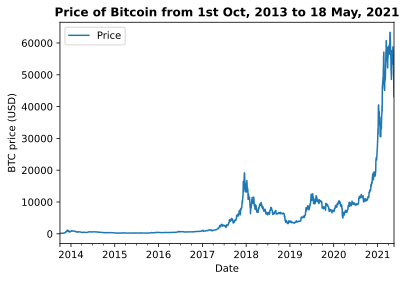

In [25]:
bitcoin_prices.plot(figsize=(6,4))
plt.ylabel('BTC price (USD)')
plt.title("Price of Bitcoin from 1st Oct, 2013 to 18 May, 2021",fontsize=12,fontweight='bold')
plt.legend(fontsize=10)
plt.show()

**2. Alternative to import data using python-csv module**

In [29]:
import csv
from datetime import datetime as dt

timesteps = []
btc_price = []
with open("bitcoin_data.csv",'r') as f:
    csv_reader=csv.reader(f,delimiter=',')
    next(csv_reader) # skip the first line which consists of column names
    for line in csv_reader:
        timesteps.append(dt.strptime(line[1],'%Y-%m-%d')) #strptime: string parse time
        # get the dates as dates not string
        btc_price.append(float(line[2])) # get closing price as float

# view first 10 of each
timesteps[:10],btc_price[:10]     

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

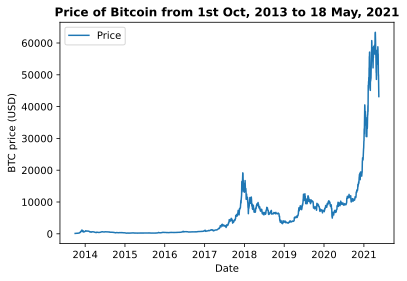

In [36]:
# plot from csv
plt.figure(figsize=(6,4))
plt.plot(timesteps,btc_price,label='Price')
plt.ylabel('BTC price (USD)')
plt.xlabel('Date')
plt.title("Price of Bitcoin from 1st Oct, 2013 to 18 May, 2021",fontsize=12,fontweight='bold')
plt.legend(fontsize=10)
plt.show()

**3. Creating train-test splits for time-series data (wrong-way)**

In [32]:
# using the dataframe of bit-coin prices
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

timesteps[:10],prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [33]:
X_train,X_test,y_train,y_test = train_test_split(timesteps,# dates
                                                 prices, # BTC prices
                                                 test_size=0.2,
                                                 random_state=random_seed
                                                 )

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2229,), (558,), (2229,), (558,))

In [35]:
X_train,y_train

(array(['2015-05-23T00:00:00.000000000', '2017-11-27T00:00:00.000000000',
        '2019-06-01T00:00:00.000000000', ...,
        '2016-11-04T00:00:00.000000000', '2017-04-17T00:00:00.000000000',
        '2016-02-08T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([ 240.1588    , 9573.9675    , 8513.20388193, ...,  701.21875   ,
        1184.2       ,  376.924     ]))

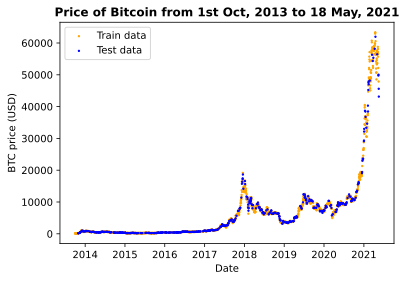

In [39]:
# plotting the wrongly split data:
# plot from csv
plt.figure(figsize=(6,4))
plt.scatter(X_train,y_train,label='Train data',s=2,c='orange')
plt.scatter(X_test,y_test,label='Test data',s=2,c='blue')
plt.xlabel("Date")
plt.ylabel('BTC price (USD)')
plt.title("Price of Bitcoin from 1st Oct, 2013 to 18 May, 2021",fontsize=12,fontweight='bold')
plt.legend(fontsize=10)
plt.show()

*We can observe a data leakage issue here*

**4. Creating train-test splits for time-series data (right-way)**

In [40]:
train_percent = 80
split_size = int(train_percent*0.01*len(timesteps))
X_train,y_train = timesteps[:split_size],prices[:split_size]
X_test,y_test = timesteps[split_size:],prices[split_size:]
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2229,), (558,), (2229,), (558,))

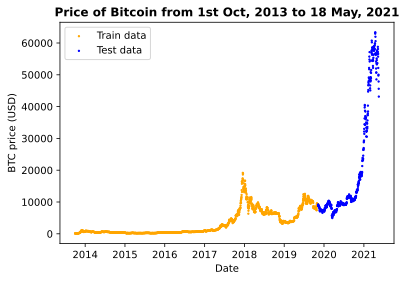

In [41]:
# plotting the wrongly split data:
# plot from csv
plt.figure(figsize=(6,4))
plt.scatter(X_train,y_train,label='Train data',s=2,c='orange')
plt.scatter(X_test,y_test,label='Test data',s=2,c='blue')
plt.xlabel("Date")
plt.ylabel('BTC price (USD)')
plt.title("Price of Bitcoin from 1st Oct, 2013 to 18 May, 2021",fontsize=12,fontweight='bold')
plt.legend(fontsize=10)
plt.show()

**5. Creating plotting function to visualize time-series data**

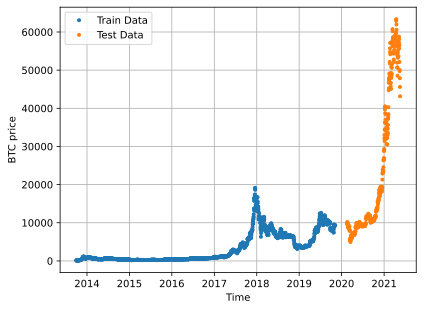

In [ ]:
def plot_time_series(timesteps,values,format='.',start=0,end=None,label=None,xlabel='Time',ylabel='Value',grid=True,legend_text_size=10,label_text_size=10):
    '''
    Plots timesteps (a series of points in time) against values (a series of values across timesteps).
    
    Parameters 
    ----------  
    timesteps : array of timestep values 
    values: array of values across time
    format: style of plot, default "."
    start: where to start the plot (setting a value will index from start of timesteps & values), default: 0
    end: where to end the plot (setting a value will end at particular index of timesteps & values), default: None
    label: label to show on plot about values, default: None
    xlabel: sets the x-label, default "Time"
    ylabel: sets the y-label, default "Values" 
    '''

    # plot the series:
    plt.plot(timesteps[start:end],values[start:end],format,label=label)
    plt.xlabel(xlabel,fontsize=label_text_size)
    plt.ylabel(ylabel,fontsize=label_text_size)
    if label:
        plt.legend(fontsize=legend_text_size)
    plt.grid(grid)


    
plot_time_series(X_train,y_train,label='Train Data')
plot_time_series(X_test,y_test,label='Test Data',ylabel='BTC price',start=100)

***-- CONTD IN NEXT NOTEBOOK --***